In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [4]:
iris_df = pd.read_csv('iris.csv')


iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df=iris_df.copy()

In [8]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [9]:
data_sl=df['sepal_length'].to_numpy()

In [10]:
data_sl[:10]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

### Use library i.e pymc3 or arviz and plot the above data on KDE plot 

In [11]:
# write your code here for plotting data variable here, you can take help from book chapter 2 ipynb file on GCR

<AxesSubplot: >

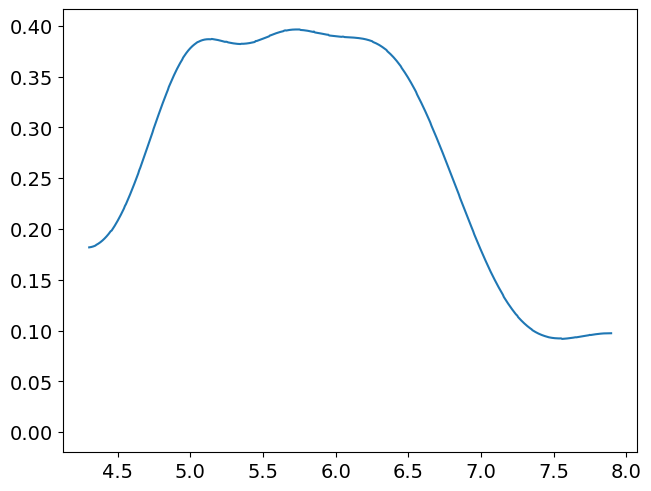

In [13]:
az.plot_kde(data_sl)

# creation of the Model here 

In [12]:
data_sw = df['sepal_width'].to_numpy()

In [13]:
# Choose priors and likelyhood
# write your inference variable here
# create your model

In [18]:
with pm.Model() as model_iris_normal:
    μ = pm.Normal('μ',mu=data_sw.mean(),sd=1)
    σ = pm.HalfNormal('σ',sd=1)
    sepal_width = pm.Normal('sepal_width',mu=μ,sd=σ,observed=data_sw)
    idata1 = pm.sample(1000, random_seed=123, return_inferencedata=True)
    
with pm.Model() as model_iris_t:
    μ = pm.Normal('μ',mu=data_sw.mean(),sd=1)
    σ = pm.HalfNormal('σ',sd=1)
    ν = pm.Exponential('ν',lam=1/30)
    sepal_width = pm.StudentT('sepal_width',nu=ν,mu=μ,sd=σ,observed=data_sw)
    idata2 = pm.sample(1000, random_seed=123, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<AxesSubplot: title={'center': 'μ'}>,
        <AxesSubplot: title={'center': 'μ'}>],
       [<AxesSubplot: title={'center': 'σ'}>,
        <AxesSubplot: title={'center': 'σ'}>],
       [<AxesSubplot: title={'center': 'ν'}>,
        <AxesSubplot: title={'center': 'ν'}>]], dtype=object)

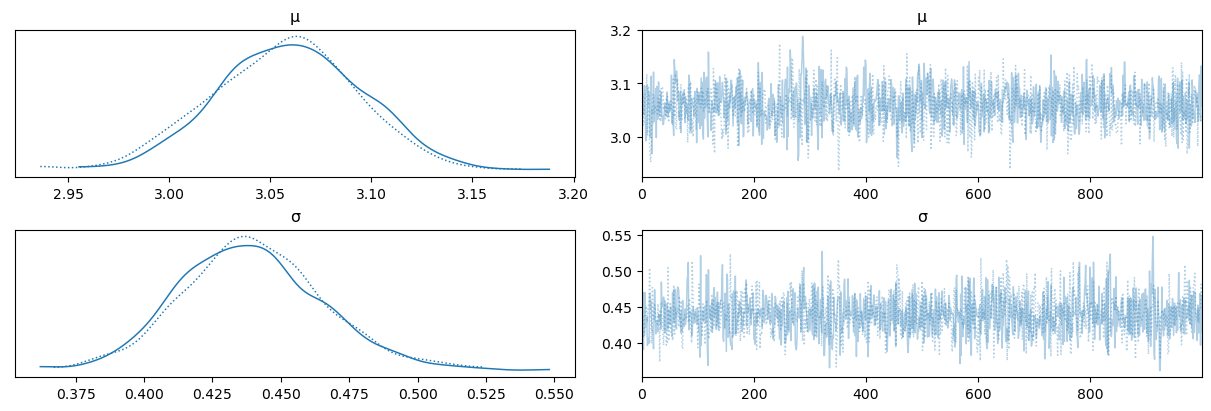

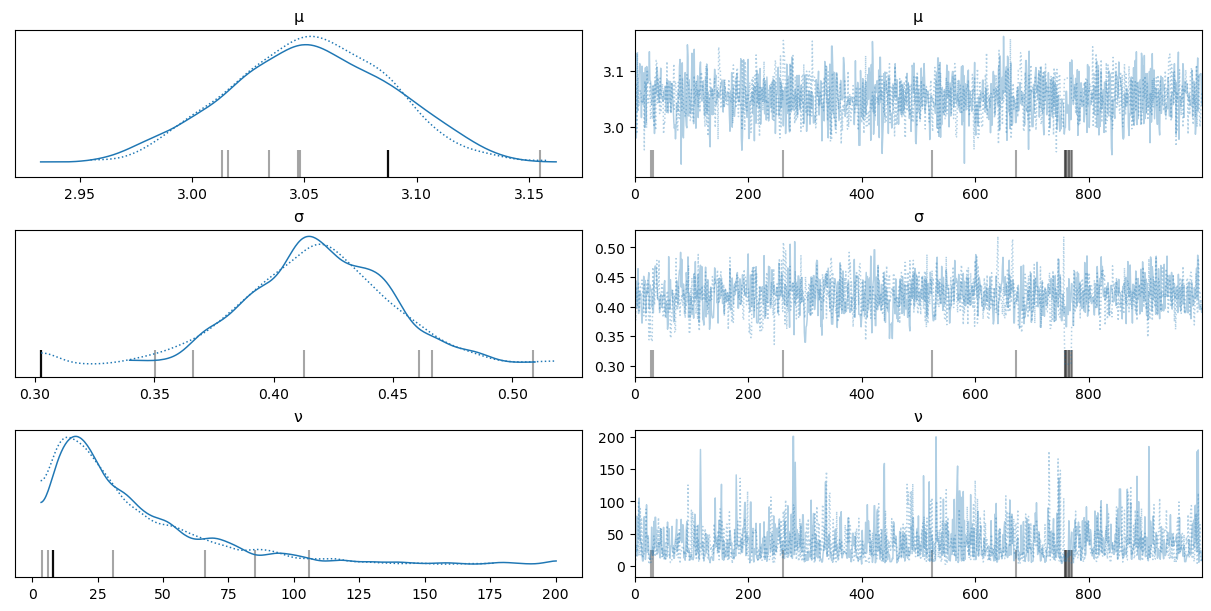

In [23]:
# plot your model inference variable here using library we disscussed in class

az.plot_trace(idata1)
az.plot_trace(idata2)

# write code here for pair plot and check the estemate for two priors

E:\anaconda3\envs\pm3bap\lib\site-packages\arviz\plots\jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")


array([<AxesSubplot: xlabel='μ', ylabel='σ'>, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

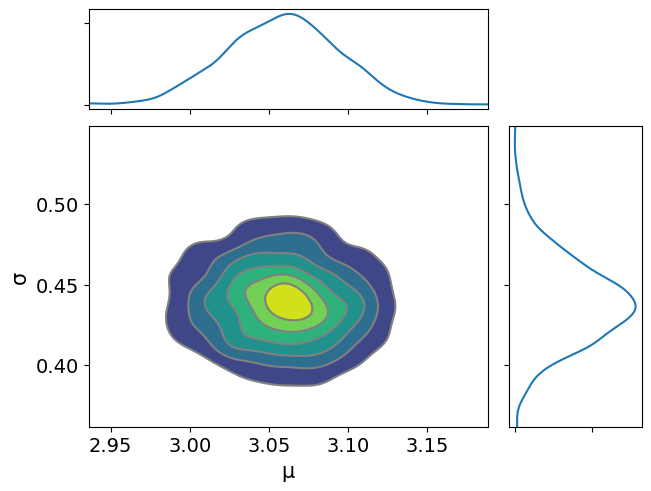

In [24]:
# write code here for pair plot and check the estemate for two priors

az.plot_joint(idata1, kind='kde', fill_last=False)

# write code here to summarise the results

In [25]:
# write code here to summarise the results

In [26]:
az.summary(idata1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,3.058,0.036,2.988,3.119,0.001,0.001,1496.0,1222.0,1.0
σ,0.439,0.026,0.392,0.491,0.001,0.000,1734.0,1236.0,1.0


In [27]:
az.summary(idata2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,3.052,0.036,2.980,3.113,0.001,0.001,1768.0,1495.0,1.0
σ,0.418,0.030,0.365,0.475,0.001,0.001,893.0,439.0,1.0
ν,35.827,28.321,3.103,88.206,0.841,0.595,858.0,1115.0,1.0


In [39]:
# write code for compairision of your results here 

In [28]:
y_pred1 = pm.sample_posterior_predictive(idata1, model=model_iris_normal, keep_size=True)
y_pred2 = pm.sample_posterior_predictive(idata2, model=model_iris_t, keep_size=True)

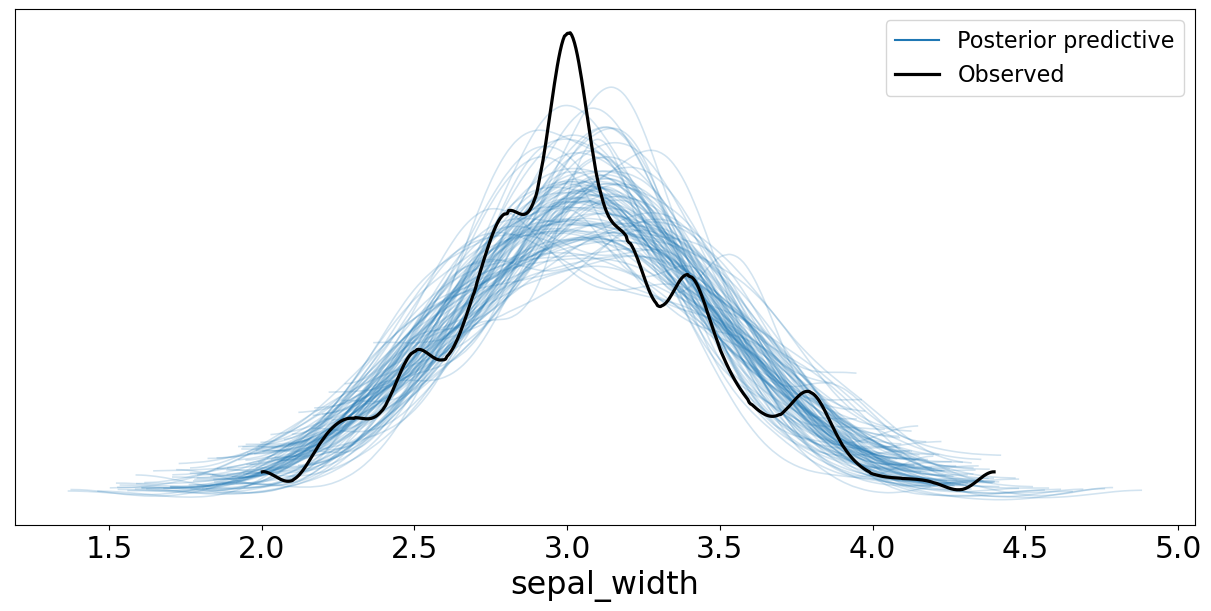

In [30]:
az.concat(idata1, az.from_dict(posterior_predictive=y_pred1), inplace=True)
ax = az.plot_ppc(idata1, num_pp_samples=100, figsize=(12, 6), mean=False)


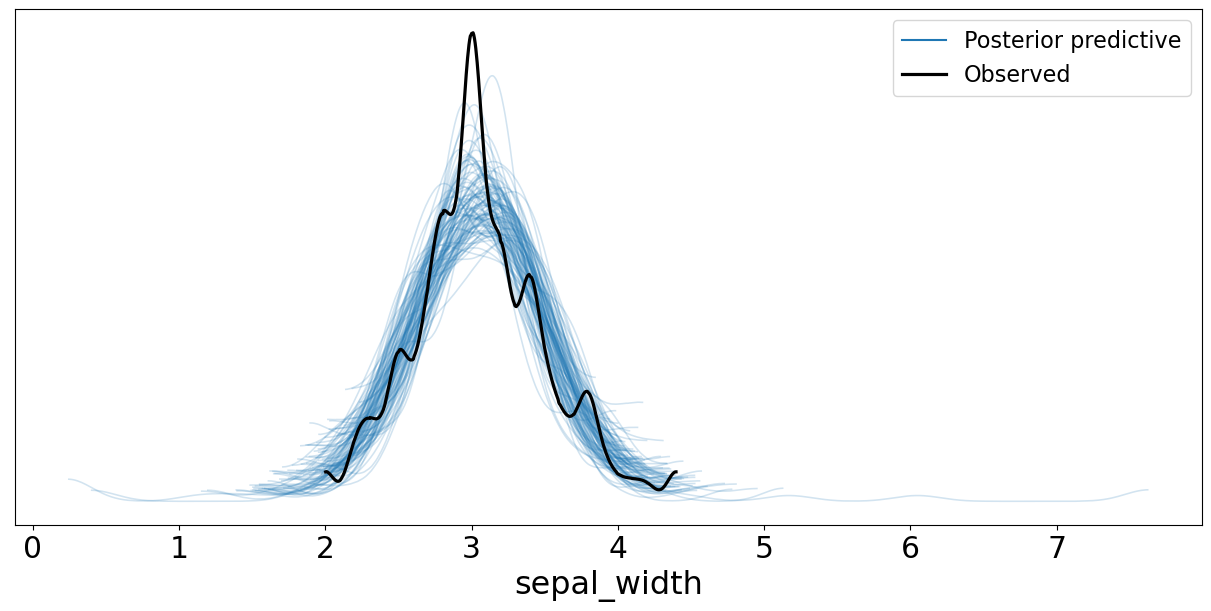

In [31]:
az.concat(idata2, az.from_dict(posterior_predictive=y_pred2), inplace=True)
ax = az.plot_ppc(idata2, num_pp_samples=100, figsize=(12, 6), mean=False)

# You can work on Student T model incase if results are not robust from above model?

The results using the T-Distribution are better as it handles the outliers better and has a heavier tail, which is most close to the observed data in sepal width column. This makes it more Robust and so we can work on it.

# Group Comparison 

In [33]:
com = iris_df['sepal_length'].values
idx = pd.Categorical(df['species'],
                     categories=['versicolor', 'setosa', 'virginica']).codes
groups = len(np.unique(idx))

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

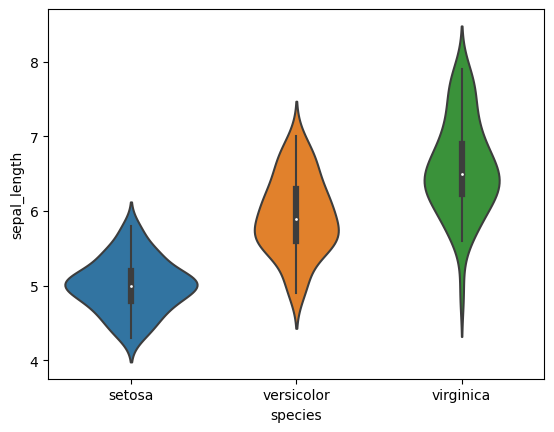

In [34]:
sns.violinplot(x='species', y='sepal_length', data=df)

In [35]:
groups

3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 41 seconds.


array([[<AxesSubplot: title={'center': 'μ'}>,
        <AxesSubplot: title={'center': 'μ'}>],
       [<AxesSubplot: title={'center': 'σ'}>,
        <AxesSubplot: title={'center': 'σ'}>]], dtype=object)

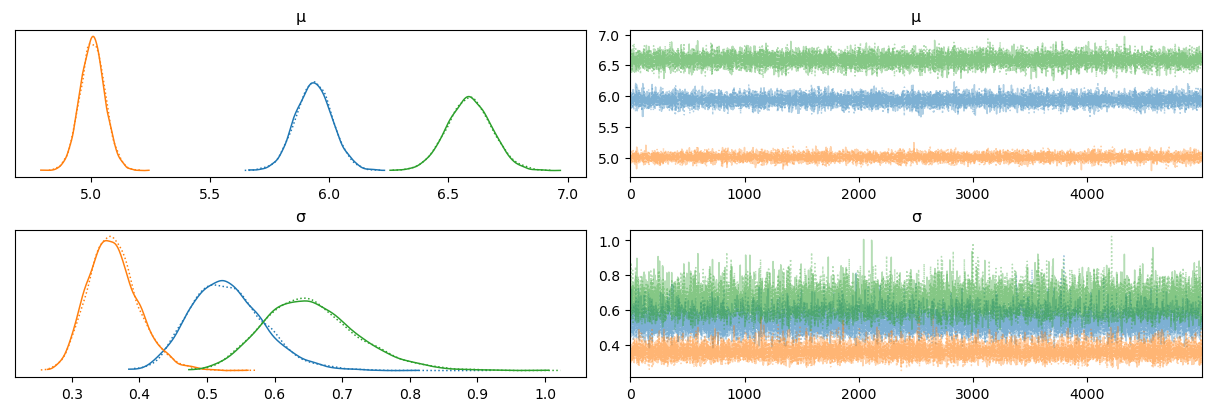

In [37]:
with pm.Model() as comparing_groups:
  # write code for model
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=data_sl)
    idata_cg = pm.sample(5000, return_inferencedata=True)

    
az.plot_trace(idata_cg)

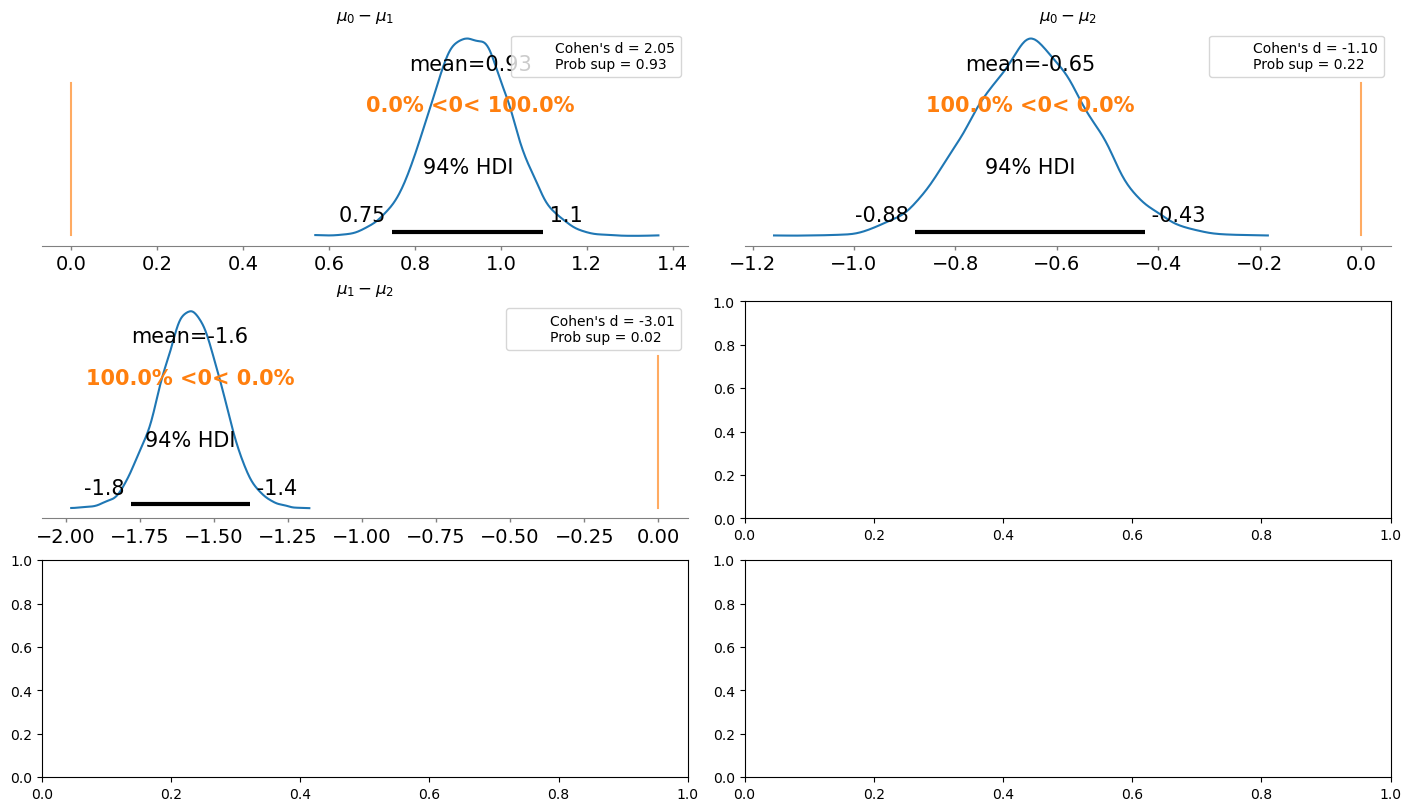

In [54]:
dist = stats.norm()

_, ax = plt.subplots(3, 2, figsize=(14, 8), constrained_layout=True)

# comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]
# pos = [(k, l) for k in range(3) for l in (0, 1)]

comparisons = [(i, j) for i in range(3) for j in range(i+1,3)]
pos = [(k, l) for k in range(2) for l in (0, 1)]

posterior_cg = idata_cg.posterior.stack(samples={"chain", "draw"})

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = posterior_cg["μ"].sel({"μ_dim_0":i}) - posterior_cg["μ"].sel({"μ_dim_0":j})
    d_cohen = (means_diff / np.sqrt((posterior_cg["σ"].sel({"σ_dim_0":i})**2 + 
                                     posterior_cg["σ"].sel({"σ_dim_0":j})**2) / 2)).mean().item()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff.values, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend()

In [39]:
# summarize the inference variable for groups

In [40]:
az.summary(idata_cg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.935,0.077,5.794,6.082,0.001,0.000,13301.0,8007.0,1.0
μ[1],5.007,0.052,4.907,5.103,0.000,0.000,13703.0,7795.0,1.0
μ[2],6.587,0.093,6.416,6.765,0.001,0.001,11534.0,7715.0,1.0
σ[0],0.530,0.055,0.431,0.632,0.000,0.000,14442.0,7365.0,1.0
σ[1],0.362,0.038,0.295,0.434,0.000,0.000,15479.0,8112.0,1.0
σ[2],0.654,0.070,0.527,0.784,0.001,0.000,14884.0,7865.0,1.0


# Your results interpretation here 

In [ ]:
# interpret group comparison here 

We can see from the Cohen D value between Setosa and Virsicolor species is 2.05 which is a moderate value meaning there is a meaningful difference between them. The Cohen D value between Setosa and Virginica is -1.10 and between Virsicolor and Virginica is -3.01 which means there is significant difference in each respective pair.

The 0.93 Probability of superiority between setosa and virsicolor shows that setosa will most probably have a higher sepal width if randomly chosen from the two groups. The probability that Setosa will be larger than a Virginica is 0.22 if they are chosen at random from amongst the two , and between Virsicolor and Virginica is 0.02.

From these conclusions we can say there are significant differences between these groups in sepal width. The virginica group has the highest sepal width, then comes setosa, then comes virsicolor.